In [35]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [24]:
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')

In [25]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [26]:
data.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


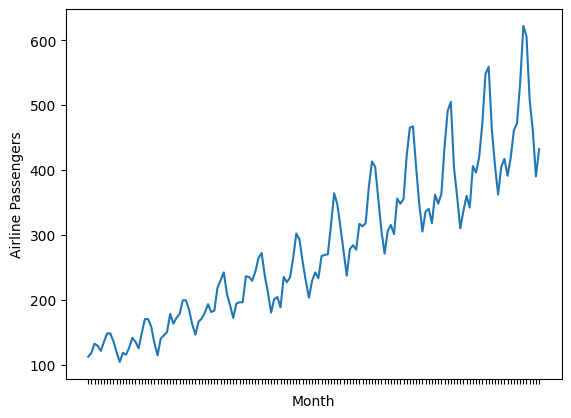

In [ ]:
plt.plot(data["Month"], data["Passengers"])
plt.xlabel("Month")
plt.gca().set_xticklabels([])
plt.ylabel("Airline Passengers")
plt.show()

In [36]:
data.Passengers_log10 = np.log10(data.Passengers)

/var/folders/f9/6h0yrys50tqbq_74_csbscjm0000gn/T/ipykernel_3055/2898654880.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.Passengers_log10 = np.log10(data.Passengers)


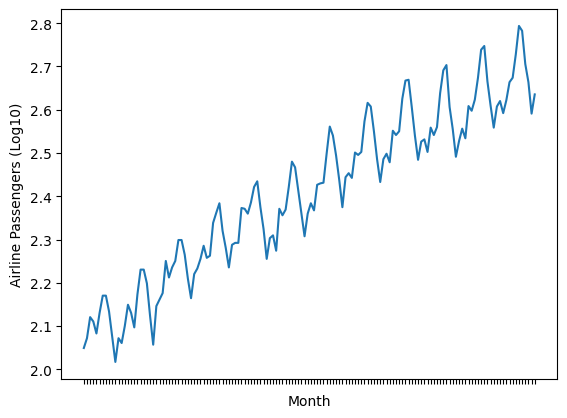

In [37]:
plt.plot(data.Month, data.Passengers_log10)
plt.xlabel("Month")
plt.gca().set_xticklabels([])
plt.ylabel("Airline Passengers (Log10)")
plt.show()

/var/folders/f9/6h0yrys50tqbq_74_csbscjm0000gn/T/ipykernel_3055/1228725472.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.Passengers_diff_log10 = data.Passengers_log10.diff()


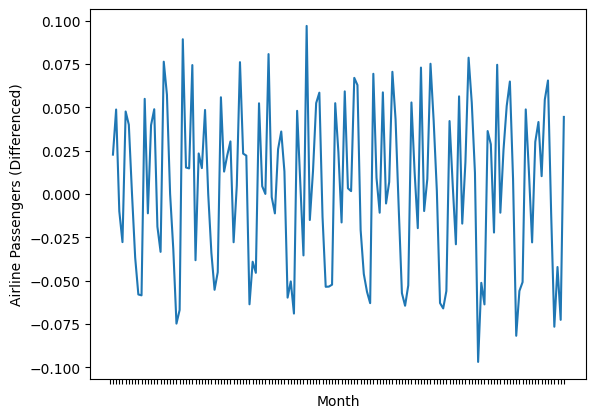

In [38]:
# apply differencing to make the data stationary
data.Passengers_diff_log10 = data.Passengers_log10.diff()
plt.plot(data.Month, data.Passengers_diff_log10)
plt.xlabel("Month")
plt.gca().set_xticklabels([])
plt.ylabel("Airline Passengers (Differenced)")
plt.show()

In [39]:
result = adfuller(data.Passengers_diff_log10.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
if result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary.")

ADF Statistic: -2.717131
p-value: 0.071121
The time series is non-stationary.


It is not stationary yet.

/var/folders/f9/6h0yrys50tqbq_74_csbscjm0000gn/T/ipykernel_3055/863684321.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.Passengers_diff_log10_seasonal = data.Passengers_diff_log10.diff(12)


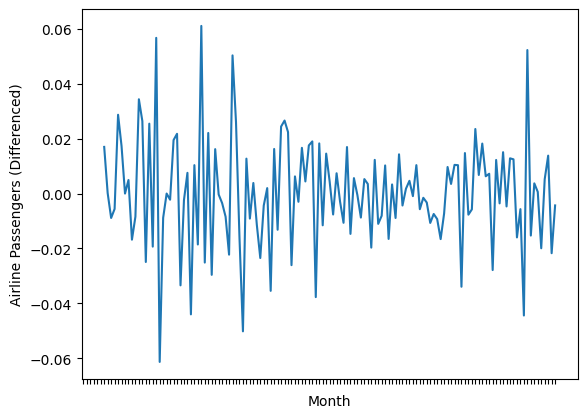

In [40]:
data.Passengers_diff_log10_seasonal = data.Passengers_diff_log10.diff(12)
plt.plot(data.Month, data.Passengers_diff_log10_seasonal)
plt.xlabel("Month")
plt.gca().set_xticklabels([])
plt.ylabel("Airline Passengers (Differenced)")
plt.show()

In [41]:
adfuller_result = adfuller(data.Passengers_diff_log10_seasonal.dropna())
print('ADF Statistic: %f' % adfuller_result[0])
print('p-value: %f' % adfuller_result[1])
if adfuller_result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary.")

ADF Statistic: -4.443325
p-value: 0.000249
The time series is stationary.
